# Homogeneous Transformation 2D Matrices Activity

* Create a hierarchical structure
* Apply homogeneous matrices
* Compose final transformations

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Traslación

Desplaza un punto $(x, y)$ a una nueva posición $(x+t_x, y+t_y)$:

$$
T(t_x, t_y) = \begin{pmatrix} 
1 & 0 & t_x \\ 
0 & 1 & t_y \\ 
0 & 0 & 1 
\end{pmatrix}
$$

In [4]:
def T(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0,  1]
    ], dtype=float)

### 2. Rotación

Rota un punto alrededor del origen por un ángulo $\theta$:

$$
R(\theta) = \begin{pmatrix} 
\cos\theta & -\sin\theta & 0 \\ 
\sin\theta & \cos\theta & 0 \\ 
0 & 0 & 1 
\end{pmatrix}
$$

In [5]:
def R(deg):
    rad = np.deg2rad(deg)
    c, s = np.cos(rad), np.sin(rad)
    return np.array([
        [c,-s, 0],
        [s, c, 0],
        [0, 0, 1]
    ], dtype=float)

### 3. Escalado

Modifica el tamaño de un objeto por factores $s_x$ y $s_y$:

$$
S(s_x, s_y) = \begin{pmatrix} 
s_x & 0 & 0 \\ 
0 & s_y & 0 \\ 
0 & 0 & 1 
\end{pmatrix}
$$

In [6]:
def S(sx, sy):
    return np.array([
        [sx, 0,  0],
        [0, sy,  0],
        [0,  0,  1]
    ], dtype=float)

## Composición de transformaciones

Una de las principales ventajas de las coordenadas homogéneas es que permiten componer transformaciones mediante multiplicación de matrices:

$$
P' = T \cdot R \cdot S \cdot P
$$

El orden de las transformaciones es crucial, ya que la multiplicación de matrices no es conmutativa.

$$
\begin{align*}
M &= T(t_x, t_y) \cdot R(\theta) \cdot S(s_x, s_y) \\
M' &= S(s_x, s_y) \cdot R(\theta) \cdot T(t_x, t_y) \\
\end{align*}
$$

$$
M \neq M'
$$

In [11]:
# Matriz compuesta
M1 = T(2,1) @ R(45) @ S(1.5, 0.5)
M2 = S(1.5, 0.5) @ R(45) @ T(2,1)

# Ejemplo tiangulo

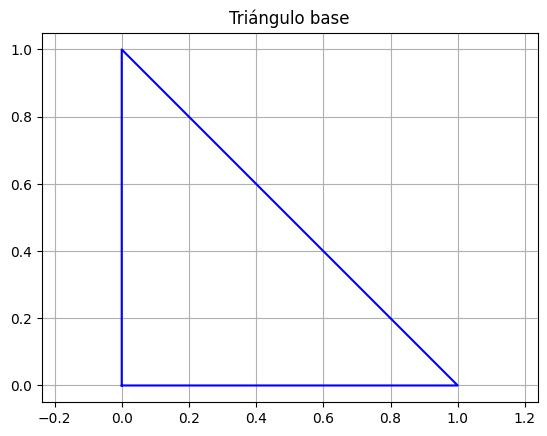

In [ ]:
# Triángulo base (3 puntos en homogéneas)
triangle = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [0,0,1]   
], dtype=float).T  

plt.plot(triangle[0], triangle[1], 'b-')
plt.axis('equal')
plt.grid()
plt.title("Triángulo base")
plt.show()

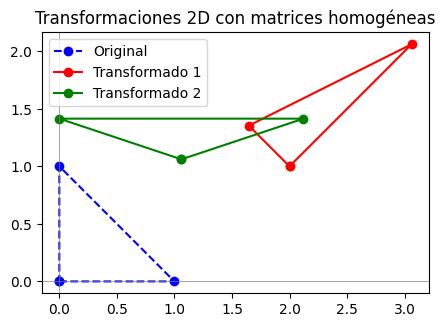

In [ ]:
triangle_transformed_1 = M1 @ triangle
triangle_transformed_2 = M2 @ triangle

plt.figure(figsize=(5,5))
# Original
plt.plot(triangle[0,:], triangle[1,:], 'b--o', label="Original")
# Transformado
plt.plot(triangle_transformed_1[0,:], triangle_transformed_1[1,:], 'r-o', label="Transformado 1")
plt.plot(triangle_transformed_2[0,:], triangle_transformed_2[1,:], 'g-o', label="Transformado 2")

plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Transformaciones 2D con matrices homogéneas")
plt.show()
